<a href="https://colab.research.google.com/github/Blue-BigData/pandas-practice/blob/main/230130_SNA_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis with Twitter
- Kpop 키워드 검색량 분석해보기 : NewJeans

## 실습 환경 세팅하기


### Google Drive 연결

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Twitter 개발자 계정 연결

In [4]:
!pip install git+https://github.com/tweepy/tweepy.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-so8svzxm
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /tmp/pip-req-build-so8svzxm
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.6 MB/s eta 0:00:00
  Created wheel for tweepy: filename=tweepy-4.12.1-py3-none-any.whl size=102442 sha256=4a2f5d291da0fe68800fb1462f216e5982fc336155125b73b63255150fecf8e6
  Stored in directory: /tmp/pip-ephem-wheel-cache-socnc7n5/wheels/ad/05/51/a78f66d15b87f9c623d2f3afc4401660ac4219e526c787fb8b
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uni

In [5]:
import tweepy     # 트위터 데이터 스크래핑 라이브러리

In [6]:
# 트위터 앱의 Keys and Access Tokens를 참조하여 자신의 설정값 입력
api_key = ''
api_secret_key = ''

In [7]:
# 인증요청 1 : 개인 앱 정보
auth = tweepy.OAuthHandler(api_key, api_secret_key)
access_token = ''
access_token_secret = ''

# 인증요청 2 : access 토큰 요청(인증 요청 참조변수 이용)
auth.set_access_token(access_token, access_token_secret)

# 인증요청 3 : twitter API 생성
api = tweepy.API(auth)

## Data Scraping

### 트위터 Data Scraping

In [19]:
# 검색할 키워드, 날짜, 개수
keyword = 'newjeans'
until = '2023-01-25'
items = 300

search = []
for status in tweepy.Cursor(api.search_tweets, q = keyword, until = until).items(items):
  search.append(status.text)

print(len(search))    # 결과물 길이 
print(search[0])      # 첫번째 text 보기 

300
RT @BLACKPINKSTATS5: Girl groups with most songs charted on Spotify Global Daily Chart Top 50 history: 

#1 @BLACKPINK - 20
#2 Fifth Harmon…


In [20]:
data = {}      # 전체 결과물 추가
i = 0          # 트윗의 번호 부여
for tweet in search :
  data['text'] = search[i]       # text 키에 text 문서를 저장한다
  print(i, " : ", data)
  i += 1

print(data)

0  :  {'text': 'RT @BLACKPINKSTATS5: Girl groups with most songs charted on Spotify Global Daily Chart Top 50 history: \n\n#1 @BLACKPINK - 20\n#2 Fifth Harmon…'}
1  :  {'text': 'foi logo depois deles terem lançado essa que os produtores do newjeans enhypen e treasure nasceram https://t.co/4eYulbnbTD'}
2  :  {'text': 'RT @NewJeansCharts: Most Streamed Month for a 4th Gen Group on Spotify of All Time:\n\n#1. NewJeans (Jan 2023) — 207.2M* 🆕\n#2. Stray Kids (De…'}
3  :  {'text': 'RT @kchartsmaster: 🇺🇸 Billboard Hot 100:\n#91 @NewJeans_ADOR - OMG [NEW]'}
4  :  {'text': 'RT @newjeans_loop: Are you Canadian ? \n\n🐻: No I’m not I’m 𝐌𝐈𝐍𝐉𝐈 𝐎𝐏𝐏𝐀\n\n#뉴진스 #NewJeans #민지 #Minji https://t.co/YFCiK0t50P'}
5  :  {'text': 'RT @theseoulstory: Brand reputation for idols in the month of January:\n\n1) BTS Jimin\n2) NewJeans Minji\n3) BTS Jungkook\n4) ASTRO Cha Eun Woo…'}
6  :  {'text': 'RT @kchartsmaster: 🇺🇸 Billboard Hot 100:\n#91 @NewJeans_ADOR - OMG [NEW]'}
7  :  {'text': 'RT @Jeff__Benjamin: #KPop Artis

### 데이터를 텍스트 파일로 저장

In [21]:
# tweet_data_newjeans.txt
import os

wfile = open("/gdrive/My Drive/tweet_data_newjeans.txt", mode = 'w')       # 쓰기 모드로 접근
data = {}
i = 0

for tweet in search :
  data['text'] = search[i]
  wfile.write(search[i] + '\n')      # 파일 출력
  i += 1

wfile.close()

In [22]:
# scraping data 내용이 저장 되었는지 확인
file = open("/gdrive/My Drive/tweet_data_newjeans.txt", 'r')

uncleaned_text = file.readlines()
file.close()

print(uncleaned_text)

['RT @BLACKPINKSTATS5: Girl groups with most songs charted on Spotify Global Daily Chart Top 50 history: \n', '\n', '#1 @BLACKPINK - 20\n', '#2 Fifth Harmon…\n', 'foi logo depois deles terem lançado essa que os produtores do newjeans enhypen e treasure nasceram https://t.co/4eYulbnbTD\n', 'RT @NewJeansCharts: Most Streamed Month for a 4th Gen Group on Spotify of All Time:\n', '\n', '#1. NewJeans (Jan 2023) — 207.2M* 🆕\n', '#2. Stray Kids (De…\n', 'RT @kchartsmaster: 🇺🇸 Billboard Hot 100:\n', '#91 @NewJeans_ADOR - OMG [NEW]\n', 'RT @newjeans_loop: Are you Canadian ? \n', '\n', '🐻: No I’m not I’m 𝐌𝐈𝐍𝐉𝐈 𝐎𝐏𝐏𝐀\n', '\n', '#뉴진스 #NewJeans #민지 #Minji https://t.co/YFCiK0t50P\n', 'RT @theseoulstory: Brand reputation for idols in the month of January:\n', '\n', '1) BTS Jimin\n', '2) NewJeans Minji\n', '3) BTS Jungkook\n', '4) ASTRO Cha Eun Woo…\n', 'RT @kchartsmaster: 🇺🇸 Billboard Hot 100:\n', '#91 @NewJeans_ADOR - OMG [NEW]\n', 'RT @Jeff__Benjamin: #KPop Artists With Multiple Entries on the @Bill

## 데이터 전처리

In [24]:
# 전처리, 그래프, 시각화 라이브러리
import re
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
# 분석에 필요없는 부분 삭제 함수
def clean_data(readData) :
  text = re.sub('\n', '', readData)
  text = re.sub('RT', '', text)
  text = re.sub('h\w{4}://\w\W.{13}', '', text)
  text = re.sub('&amp;', '', text)
  text = re.sub('@\w{2,15}', '', text)
  text = re.sub('^https', '', text)
  text = re.sub("[_《》….()!,'?&;*“”‘’=+-/#%]",'', text)
  text = re.sub('"','', text)
  text = re.sub('[0-9:]', '', text)
    
  text = text.lower()           # 영어라서 소문자로 바꿔준다
    
  return text

In [28]:
# 이모티콘 제거 함수
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def remove_emoji(readData):
    text = re.sub(emoji_pattern, '', readData)
    return text

In [34]:
# 데이터 정제하기
cleaned_text = []

for i in range(len(uncleaned_text)):
  first_cleaned_text = clean_data(uncleaned_text[i])
  second_cleaned_text = remove_emoji(first_cleaned_text)
  cleaned_text.append(second_cleaned_text)

print(cleaned_text)

['  girl groups with most songs charted on spotify global daily chart top  history ', '', '   ', ' fifth harmon', 'foi logo depois deles terem lançado essa que os produtores do newjeans enhypen e treasure nasceram ', '  most streamed month for a th gen group on spotify of all time', '', ' newjeans jan  — m 🆕', ' stray kids de', '   billboard hot ', '   omg [new]', '  are you canadian  ', '', ' no im not im 𝐌𝐈𝐍𝐉𝐈 𝐎𝐏𝐏𝐀', '', '뉴진스 newjeans 민지 minji ', '  brand reputation for idols in the month of january', '', ' bts jimin', ' newjeans minji', ' bts jungkook', ' astro cha eun woo', '   billboard hot ', '   omg [new]', '  kpop artists with multiple entries on the  hot ', '', 'psy', 'cl', 'bts', 'blackpink', 'jhope', 'suga', 'lisa', 'jung kook', 'newjeans', '  billboard hot  new omg newjeans ', '  s omg debuts at no  on this weeks hot', ' eu tbm acho que o ive não tem um conceito parecido com o newjeans e tbm nao acho que o conceito delas ', '   billboard hot ', '   omg [new]', '   me talkin

### 데이터 토큰화

In [35]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [36]:
# 토큰화
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag      # 품사 판별
from nltk.corpus import stopwords

In [38]:
all_nouns = []

for t in range(len(cleaned_text)):
  x = word_tokenize(cleaned_text[t])       # 토큰화
  words = pos_tag(x)                       # 품사 태깅
  nouns = ""
  for word, pos in words :
    if pos in ['NN', 'NNP', 'NNS']:        # 명사, 고유명사, 명사 복수형
      param = word
      nouns = nouns + param + ' '
    all_nouns.append(nouns)

  print(all_nouns)

['girl ', 'girl groups ', 'girl groups ', 'girl groups ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart history ']
['girl ', 'girl groups ', 'girl groups ', 'girl groups ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart history ']
['girl ', 'girl groups ', 'girl groups ', 'girl groups ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart ', 'girl groups songs spotify chart history ']
['girl ', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 중복 단어, 동시 출연 빈도

In [39]:
# 한 트윗 내 중복 단어 점검
file = open('dummy.txt', 'w')
for article in all_nouns:
  article = list(set(article.split()))    # 단어별로 분리한 것을 set에 넣어 중복 제거, 다시 list로 변경
  print(article)
  for i in range(len(article)):
    file.write(article[i] + ' ')
  file.write('\n')

file.close()

['girl']
['groups', 'girl']
['groups', 'girl']
['groups', 'girl']
['groups', 'girl', 'songs']
['groups', 'girl', 'songs']
['groups', 'girl', 'songs']
['spotify', 'groups', 'girl', 'songs']
['spotify', 'groups', 'girl', 'songs']
['spotify', 'groups', 'girl', 'songs']
['chart', 'groups', 'spotify', 'girl', 'songs']
['chart', 'groups', 'spotify', 'girl', 'songs']
['chart', 'groups', 'spotify', 'girl', 'history', 'songs']
[]
['harmon']
['foi']
['logo', 'foi']
['depois', 'logo', 'foi']
['depois', 'deles', 'logo', 'foi']
['depois', 'deles', 'logo', 'foi']
['depois', 'deles', 'logo', 'foi']
['essa', 'foi', 'depois', 'logo', 'deles']
['que', 'essa', 'foi', 'depois', 'logo', 'deles']
['que', 'essa', 'foi', 'depois', 'logo', 'os', 'deles']
['que', 'essa', 'foi', 'depois', 'logo', 'os', 'produtores', 'deles']
['que', 'essa', 'foi', 'depois', 'logo', 'os', 'produtores', 'deles']
['que', 'essa', 'foi', 'depois', 'newjeans', 'logo', 'os', 'produtores', 'deles']
['que', 'essa', 'foi', 'depois', 'newj

In [40]:
# 단어의 동시 출연 빈도
count = {}

for article in open('dummy.txt'):
  article = list(set(article.split())) 
  for i, a in enumerate(article):             # 인덱스(i)와 원소(a)를 동시에 접근하면서 반복문 돌기
    for b in article[i:]:
      if a==b: 
        continue                 # 같은 단어의 경우는 세지 않으므로 그냥 지나간다
      if a>b: 
        a,b = b,a                # A, B와 B, A가 다르게 세어지는것을 막기 위해 항상 a < b로 순서 고정
        count[a, b] = count.get((a,b),0)+1   
        b,a = a,b
      elif a<b:
        count[a, b] = count.get((a,b),0)+1  
print(count)

{('girl', 'groups'): 48, ('groups', 'songs'): 54, ('girl', 'songs'): 50, ('groups', 'spotify'): 36, ('girl', 'spotify'): 34, ('songs', 'spotify'): 24, ('chart', 'groups'): 28, ('chart', 'spotify'): 16, ('chart', 'girl'): 12, ('chart', 'songs'): 12, ('chart', 'history'): 4, ('groups', 'history'): 52, ('history', 'spotify'): 4, ('girl', 'history'): 4, ('history', 'songs'): 26, ('foi', 'logo'): 15, ('depois', 'logo'): 14, ('depois', 'foi'): 14, ('deles', 'depois'): 13, ('deles', 'logo'): 13, ('deles', 'foi'): 13, ('essa', 'foi'): 10, ('depois', 'essa'): 10, ('essa', 'logo'): 10, ('deles', 'essa'): 10, ('foi', 'que'): 9, ('essa', 'que'): 9, ('depois', 'que'): 9, ('logo', 'que'): 9, ('deles', 'que'): 9, ('os', 'que'): 8, ('foi', 'os'): 8, ('essa', 'os'): 8, ('depois', 'os'): 8, ('logo', 'os'): 8, ('deles', 'os'): 8, ('produtores', 'que'): 7, ('foi', 'produtores'): 7, ('essa', 'produtores'): 7, ('depois', 'produtores'): 7, ('logo', 'produtores'): 7, ('os', 'produtores'): 7, ('deles', 'produt

## 엣지 리스트 그래프

In [45]:
# 엣지 리스트를 그리기 위한 사전 작업
min_num = 30             # 동시 출현 빈도 카운팅 현황에 맞게 조절할 변수

file = open('edge_list.txt', 'w')
for key, value in count.items() :
  if value >= min_num :
    print(key, value)
    string = str(key).strip("()")
    string = string.replace("'", "")
    string = string.replace(",","")
    newstr = string + '\n'
    file.write(newstr)

file.close()

('girl', 'groups') 48
('groups', 'songs') 54
('girl', 'songs') 50
('groups', 'spotify') 36
('girl', 'spotify') 34
('groups', 'history') 52
('gen', 'month') 168
('gen', 'group') 152
('group', 'month') 144
('group', 'spotify') 106
('gen', 'spotify') 96
('month', 'spotify') 96
('newjeans', '—') 84
('m', 'newjeans') 48
('m', '—') 48
('billboard', 'hot') 81
('brand', 'reputation') 33
('artists', 'kpop') 33
('entries', 'kpop') 53
('newjeans', 'omg') 206
('omg', 's') 161
('debuts', 's') 144
('debuts', 'omg') 285
('debuts', 'weeks') 120
('omg', 'weeks') 120
('newjeans', 'o') 81
('como', 'newjeans') 60
('billboard', 'newjeans') 71
('blackpink', 'newjeans') 62
('ao', 'lobos') 40
('ao', 'som') 34
('lobos', 'som') 34
('ao', 'newjeans') 66
('debuts', 'newjeans') 230
('billboards', 'newjeans') 93
('billboards', 'debuts') 84
('kpop', 'newjeans') 134
('billboards', 'kpop') 54
('debuts', 'kpop') 54
('artist', 'kpop') 88
('artist', 'newjeans') 88
('artist', 'billboards') 48
('artist', 'debuts') 48
('his

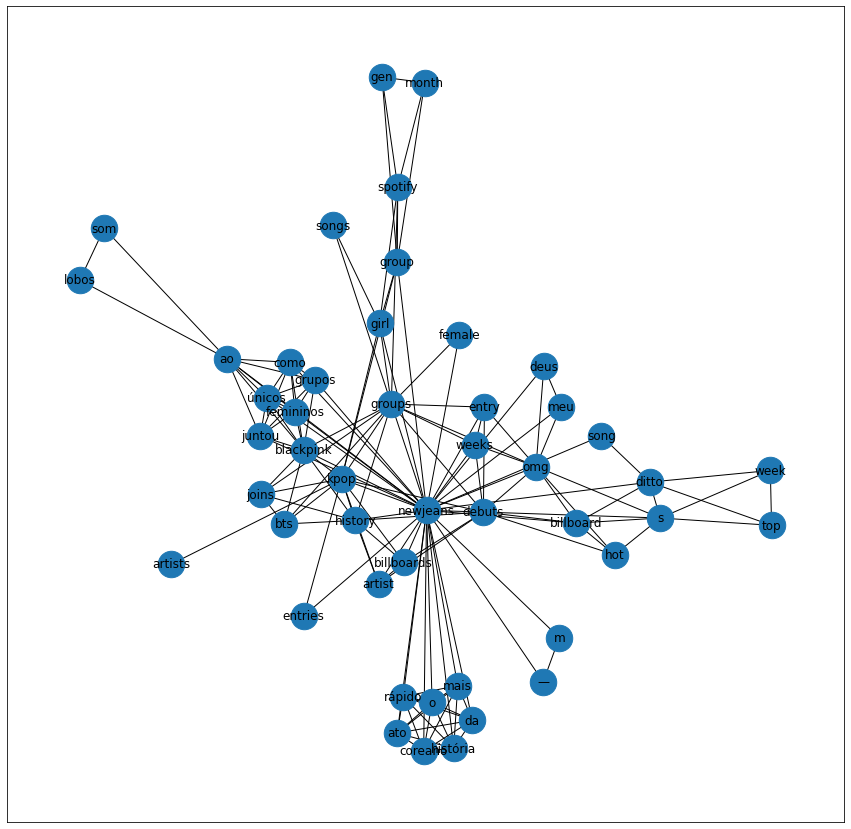

In [59]:
# 텍스트 파일을 읽고, 엣지 리스트 그래프 그리기
G = nx.read_edgelist("edge_list.txt", create_using = nx.Graph())
G.remove_nodes_from(['brand','reputation','ๆ', 'ของสาว'])

plt.figure(figsize = (15, 15))
nx.draw_networkx(G, node_size = 700)

(-1.177932622108585,
 1.2069528735940285,
 -1.1003106308122284,
 1.117277741850468)

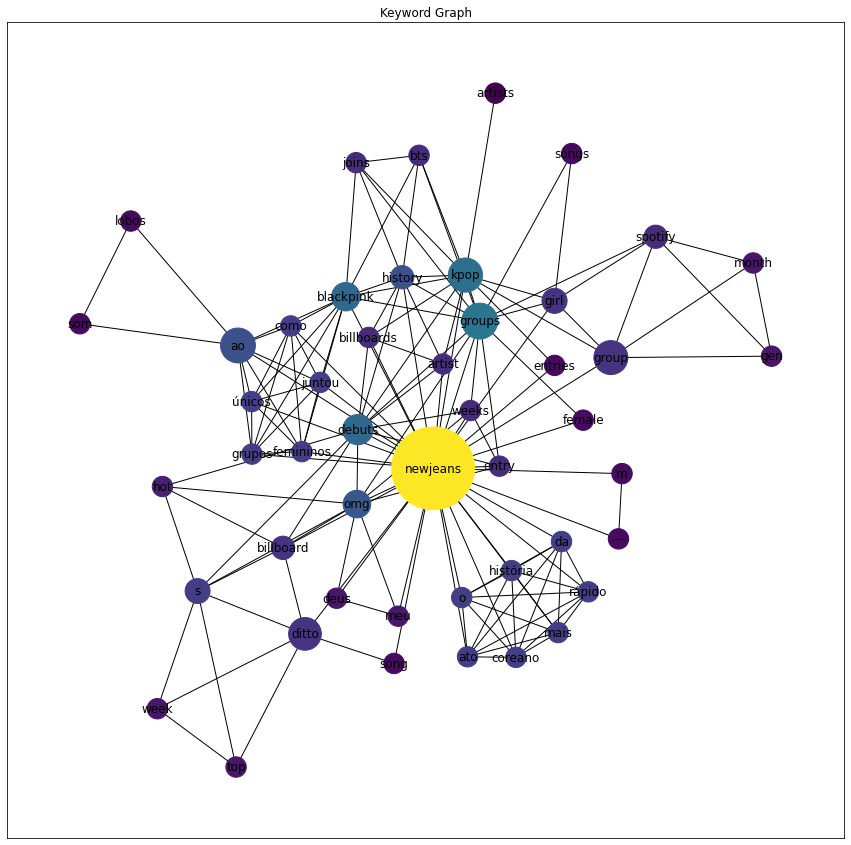

In [62]:
pos = nx.kamada_kawai_layout(G)

betCent = nx.betweenness_centrality(G, normalized = True, endpoints = True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size = [v * 10000 for v in betCent.values()]

plt.figure(figsize = (15, 15))
plt.title("Keyword Graph")
nx.draw_networkx(G, pos = pos, with_labels = True, node_color = node_color, node_size = node_size)

plt.axis('on')